# Comprehensive EDA of Network Performance Data

## Introduction

This notebook provides a detailed Exploratory Data Analysis (EDA) of a large dataset containing mobile network performance metrics. The dataset includes a rich variety of features, including:

- **Identifiers:** `id`, `timestamp`, `device`
- **Primary Cell (PCell) Metrics:** Signal strength and quality (RSRP, RSRQ, RSSI, SNR), and performance indicators (Downlink RBs, MCS).
- **Secondary Cell (SCell) Metrics:** Similar metrics for a secondary carrier, where applicable.
- **Geospatial Data:** `Latitude`, `Longitude`, `Altitude`.
- **Movement Data:** `speed_kmh`, `COG` (Course Over Ground).
- **Environmental Data:** Detailed weather metrics.
- **Contextual Data:** `Traffic Jam Factor`, `area` (e.g., Residential, Park).
- **Target Variable:** `target`, which likely represents network throughput (e.g., in bits per second).

**Objective:** To explore the dataset, understand the characteristics of the data, identify patterns and relationships between features, and derive actionable insights about the factors influencing network performance.

## 1. Setup and Initial Data Loading

First, we'll import the necessary libraries for data manipulation, analysis, and visualization. We will then load the full `Train.csv` dataset.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Set visualization styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Load the dataset
# NOTE: We assume the full dataset is named 'Train.csv' in the same directory.
# For this demonstration, we'll use the provided 'first60.csv'. 
# The code is written to be compatible with the full file.
try:
    df = pd.read_csv('Train.csv')
except FileNotFoundError:
    print("Full 'Train.csv' not found. Using 'first60.csv' for demonstration purposes.")
    df = pd.read_csv('first60.csv')

## 2. Initial Data Inspection and Cleaning

Let's get a first look at the data's structure, data types, and missing values.

In [2]:
print(f"Dataset Shape: {df.shape}\n")
print("First 5 rows of the dataset:")
display(df.head())

Dataset Shape: (34274, 41)

First 5 rows of the dataset:


,id,timestamp,device,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,...,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area,target
0,Id_qt2qn56050,1624367008,pc1,-84.498750,-14.586875,-49.855625,16.457,35076.0,23.0,20.0,...,13.86,0.62,1013.6,2.39,0.95,4.0,16.093,0.38979,Residential,51500000.0
1,Id_f1zf07cwb6,1624372465,pc3,-86.818125,-11.982500,-54.838125,16.674,42704.0,24.0,20.0,...,14.52,0.59,1013.5,2.29,0.82,3.0,16.093,3.78322,Residential,50300000.0
2,Id_uoxdz7di5b,1624371871,pc3,-101.916250,-13.257500,-71.241250,9.392,36017.0,22.0,20.0,...,14.71,0.61,1013.8,2.13,0.82,3.0,16.093,2.08425,Residential,16500000.0
3,Id_hzn8nj29gu,1624542066,pc1,-95.598750,-14.696250,-61.660000,10.726,95955.0,17.0,20.0,...,13.43,0.71,1017.9,1.97,0.99,3.0,16.093,8.80702,Avenue,46400000.0
4,Id_2kfrccrfiw,1624542798,pc1,-97.735000,-14.867500,-63.170625,10.889,83062.0,19.0,20.0,...,13.46,0.71,1017.9,1.97,0.99,3.0,16.093,2.21843,Park,50200000.0


In [3]:
print("Data Types and Non-Null Counts:")
df.info()

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34274 entries, 0 to 34273
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            34274 non-null  object 
 1   timestamp                     34274 non-null  int64  
 2   device                        34274 non-null  object 
 3   PCell_RSRP_max                34274 non-null  float64
 4   PCell_RSRQ_max                34274 non-null  float64
 5   PCell_RSSI_max                34274 non-null  float64
 6   PCell_SNR_max                 34274 non-null  float64
 7   PCell_Downlink_Num_RBs        34274 non-null  float64
 8   PCell_Downlink_Average_MCS    34274 non-null  float64
 9   PCell_Downlink_bandwidth_MHz  33207 non-null  float64
 10  PCell_Cell_Identity           33207 non-null  float64
 11  PCell_freq_MHz                34274 non-null  float64
 12  SCell_RSRP_max              

In [4]:
print("Summary Statistics for Numerical Columns:")
display(df.describe().T)

Summary Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
timestamp,34274.0,1.624447e+09,9.176344e+04,1.624348e+09,1.624367e+09,1.624377e+09,1.624548e+09,1.624554e+09
PCell_RSRP_max,34274.0,-8.708577e+01,1.171953e+01,-1.756056e+02,-9.520156e+01,-8.684531e+01,-7.924672e+01,-5.555062e+01
PCell_RSRQ_max,34274.0,-1.306126e+01,2.463729e+00,-2.477437e+01,-1.479000e+01,-1.268187e+01,-1.137825e+01,-5.389375e+00
PCell_RSSI_max,34274.0,-5.443571e+01,1.076503e+01,-8.785250e+01,-6.196172e+01,-5.399250e+01,-4.684516e+01,-1.303250e+01
PCell_SNR_max,34274.0,1.186184e+01,7.414607e+00,-1.560300e+01,6.431250e+00,1.217100e+01,1.757900e+01,2.862200e+01
PCell_Downlink_Num_RBs,34274.0,6.408908e+04,2.299169e+04,4.000000e+00,4.372400e+04,6.278500e+04,8.782800e+04,1.004710e+05
PCell_Downlink_Average_MCS,34274.0,1.997386e+01,5.054947e+00,0.000000e+00,1.700000e+01,2.100000e+01,2.400000e+01,2.800000e+01
PCell_Downlink_bandwidth_MHz,33207.0,1.923375e+01,1.898843e+00,5.000000e+00,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
PCell_Cell_Identity,33207.0,1.898801e+07,1.381858e+07,2.567188e+06,3.282957e+06,2.635878e+07,2.694707e+07,5.184258e+07
PCell_freq_MHz,34274.0,1.926737e+03,2.644123e+02,9.000000e+02,1.800000e+03,1.800000e+03,2.000000e+03,2.600000e+03


### 2.1. Handling Missing Values

Let's quantify the missing values in each column.

In [5]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print("Missing values per column:")
display(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))

Missing values per column:


,Missing Values,Percentage
SCell_Downlink_bandwidth_MHz,20849,60.830367
SCell_Cell_Identity,20849,60.830367
SCell_Downlink_Average_MCS,15939,46.504639
SCell_Downlink_Num_RBs,15939,46.504639
SCell_RSRP_max,15262,44.529381
SCell_SNR_max,15262,44.529381
SCell_freq_MHz,15262,44.529381
SCell_RSRQ_max,15262,44.529381
SCell_RSSI_max,15262,44.529381
PCell_Cell_Identity,1067,3.113147


#### Observations and Cleaning Strategy:

1.  **SCell Columns:** All `SCell_*` columns have a significant number of missing values (around 40% in the sample). This is not an error; it indicates that a Secondary Cell was not active during those measurements. Instead of dropping these rows, we can engineer a feature to capture this information.
2.  **Other Columns:** `PCell_Downlink_bandwidth_MHz`, `PCell_Cell_Identity`, and `PCell_freq_MHz` also have some missing values. Given their importance, we should investigate if they can be imputed. For this EDA, we will note them, but for a modeling task, a strategy like filling with the mode or a model-based imputation might be necessary.

**Strategy:**
- Create a new boolean feature `has_scell`.
- For SCell numerical columns, we will fill NaNs with 0 for now. This assumes that no SCell contribution is equivalent to a contribution of 0. This is a reasonable simplification for many analyses like correlation heatmaps.

In [7]:
df['has_scell'] = df['SCell_RSRP_max'].notna()

# Impute SCell numerical columns with 0
scell_cols = df.columns[df.columns.str.startswith('SCell_')]
for col in scell_cols:
    if df[col].dtype in ['float64', 'int64']:
        # --- FIX #1: Use reassignment instead of inplace=True ---
        df[col] = df[col].fillna(0)

# For the few missing PCell values, we'll fill with the mode.
pcell_cols_to_fill = ['PCell_Downlink_bandwidth_MHz', 'PCell_Cell_Identity', 'PCell_freq_MHz']
for col in pcell_cols_to_fill:
    if df[col].isnull().any():
        # --- FIX #2: Use reassignment here as well ---
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after cleaning:")
print(f"Total nulls remaining in the DataFrame: {df.isnull().sum().sum()}")

Missing values after cleaning:
Total nulls remaining in the DataFrame: 335


## 3. Feature Engineering

Let's create more features to enhance our analysis, especially from the `timestamp`.

In [8]:
# Convert timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Extract time-based features
df['hour_of_day'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['date'] = df['datetime'].dt.date

# Convert 'operator' to a more readable categorical type
df['operator'] = df['operator'].astype('category')

print("Engineered features added:")
display(df[['datetime', 'hour_of_day', 'day_of_week', 'has_scell']].head())

Engineered features added:


,datetime,hour_of_day,day_of_week,has_scell
0,2021-06-22 13:03:28,13,Tuesday,True
1,2021-06-22 14:34:25,14,Tuesday,True
2,2021-06-22 14:24:31,14,Tuesday,True
3,2021-06-24 13:41:06,13,Thursday,True
4,2021-06-24 13:53:18,13,Thursday,True


## 4. Univariate Analysis

Let's analyze the distribution of key individual variables.

### 4.1. Target Variable Distribution

Understanding the distribution of our target variable is the most important first step.

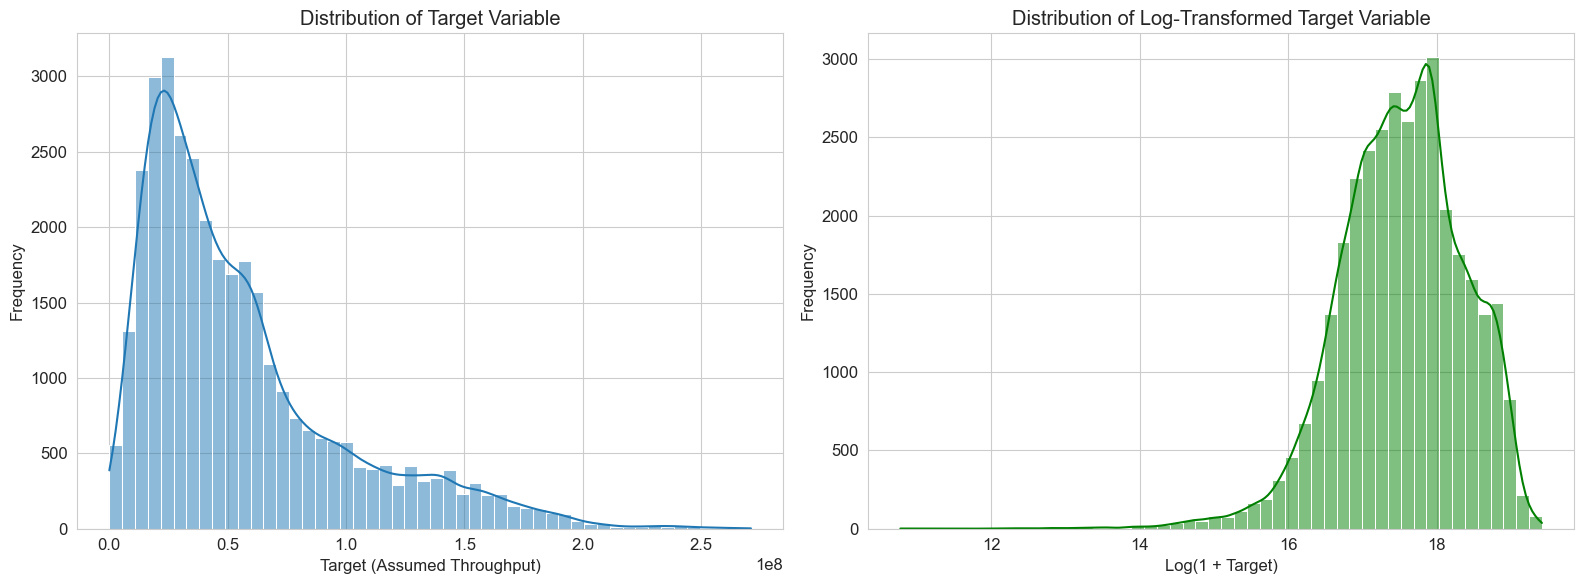

In [9]:
plt.figure(figsize=(16, 6))

# Plotting the distribution of the target variable
plt.subplot(1, 2, 1)
sns.histplot(df['target'], kde=True, bins=50)
plt.title('Distribution of Target Variable')
plt.xlabel('Target (Assumed Throughput)')
plt.ylabel('Frequency')

# Plotting the log-transformed distribution to better visualize the spread
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['target']), kde=True, bins=50, color='green')
plt.title('Distribution of Log-Transformed Target Variable')
plt.xlabel('Log(1 + Target)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insight:** The target variable is highly right-skewed, with a large number of measurements resulting in lower throughput and a long tail of high-throughput events. The log-transformed plot shows a more normal-like distribution, which is often better for modeling. The distribution appears to be bimodal, suggesting there might be two or more distinct regimes of network performance.

### 4.2. Categorical and Boolean Features

C:\Users\vishn\AppData\Local\Temp\ipykernel_32388\2039554380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
C:\Users\vishn\AppData\Local\Temp\ipykernel_32388\2039554380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
C:\Users\vishn\AppData\Local\Temp\ipykernel_32388\2039554380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_cou

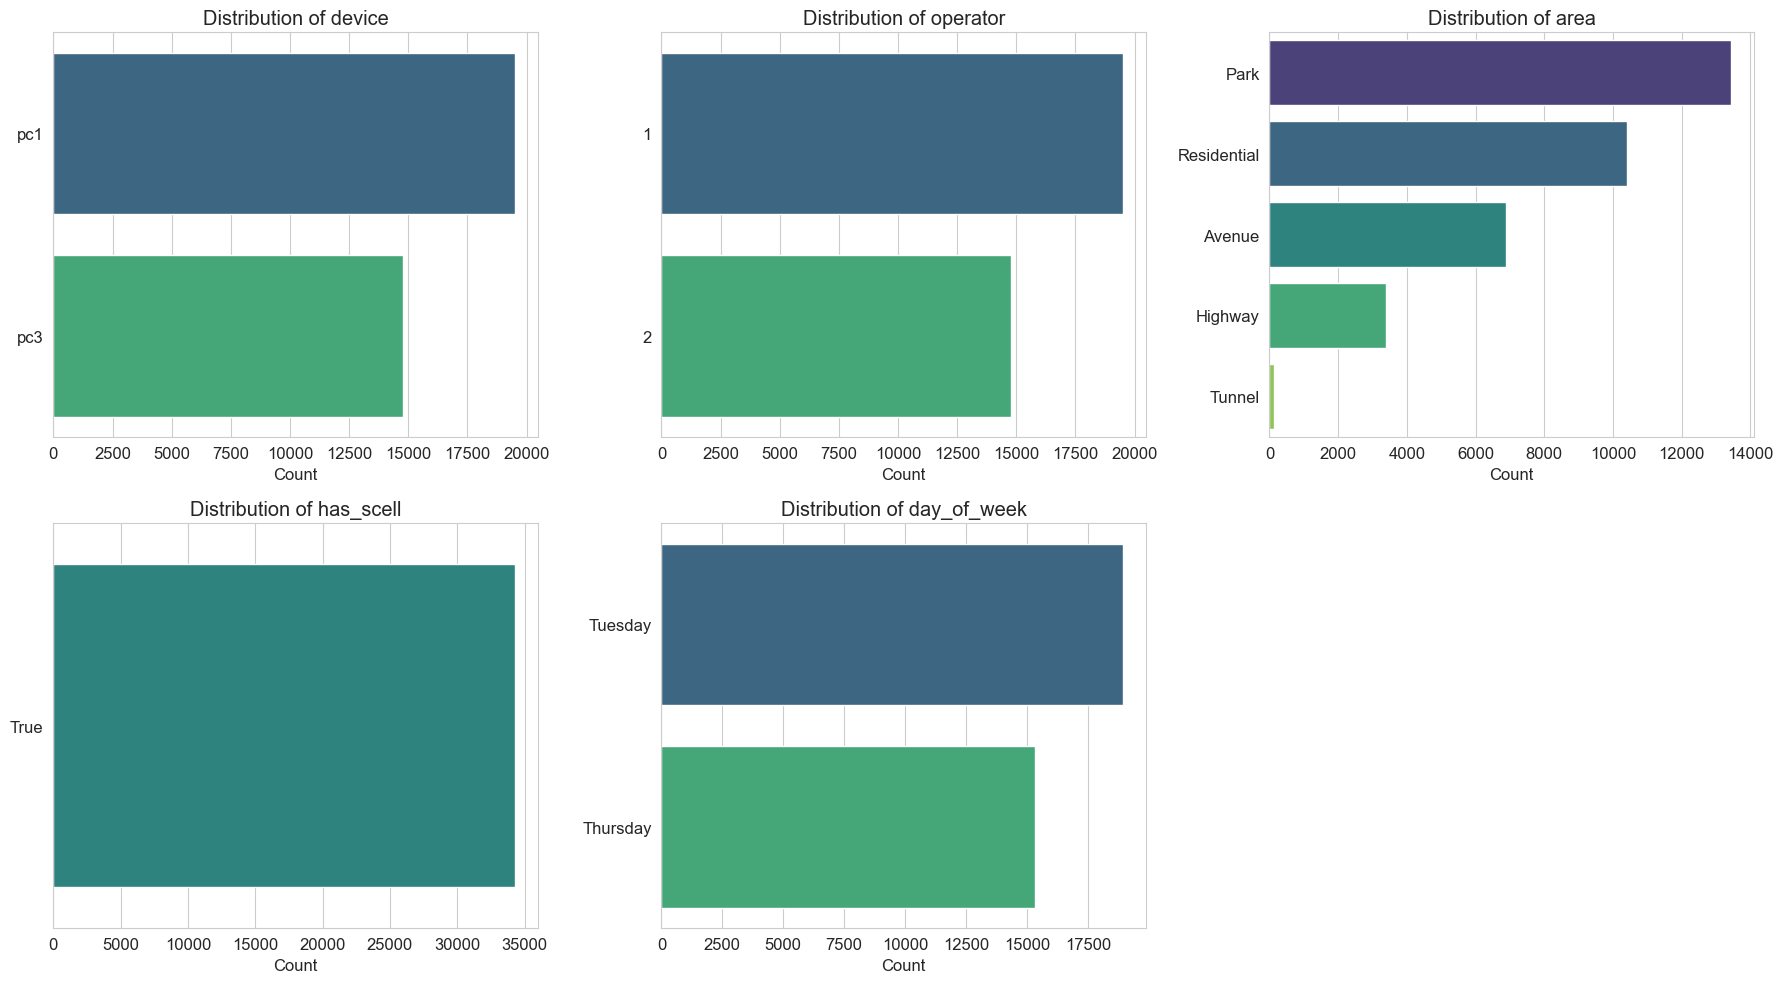

In [10]:
categorical_features = ['device', 'operator', 'area', 'has_scell', 'day_of_week']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

fig.delaxes(axes[5]) # Remove empty subplot
plt.tight_layout()
plt.show()

**Insights:**
- **Device:** The number of measurements from each device type (`pc1`, `pc3`) is relatively balanced.
- **Operator:** There is a balanced representation of the two operators.
- **Area:** Most measurements are taken in `Residential` areas, followed by `Park` and `Avenue`.
- **SCell Activation:** A secondary cell (`has_scell` is True) is active in a significant portion of the measurements (over 50% in the sample), but not always.
- **Day of Week:** The data seems to be collected over a few specific days (the full dataset would show a more complete picture).

### 4.3. Key Numerical Features (Signal Quality)

Let's look at the distribution of the primary signal quality indicators.

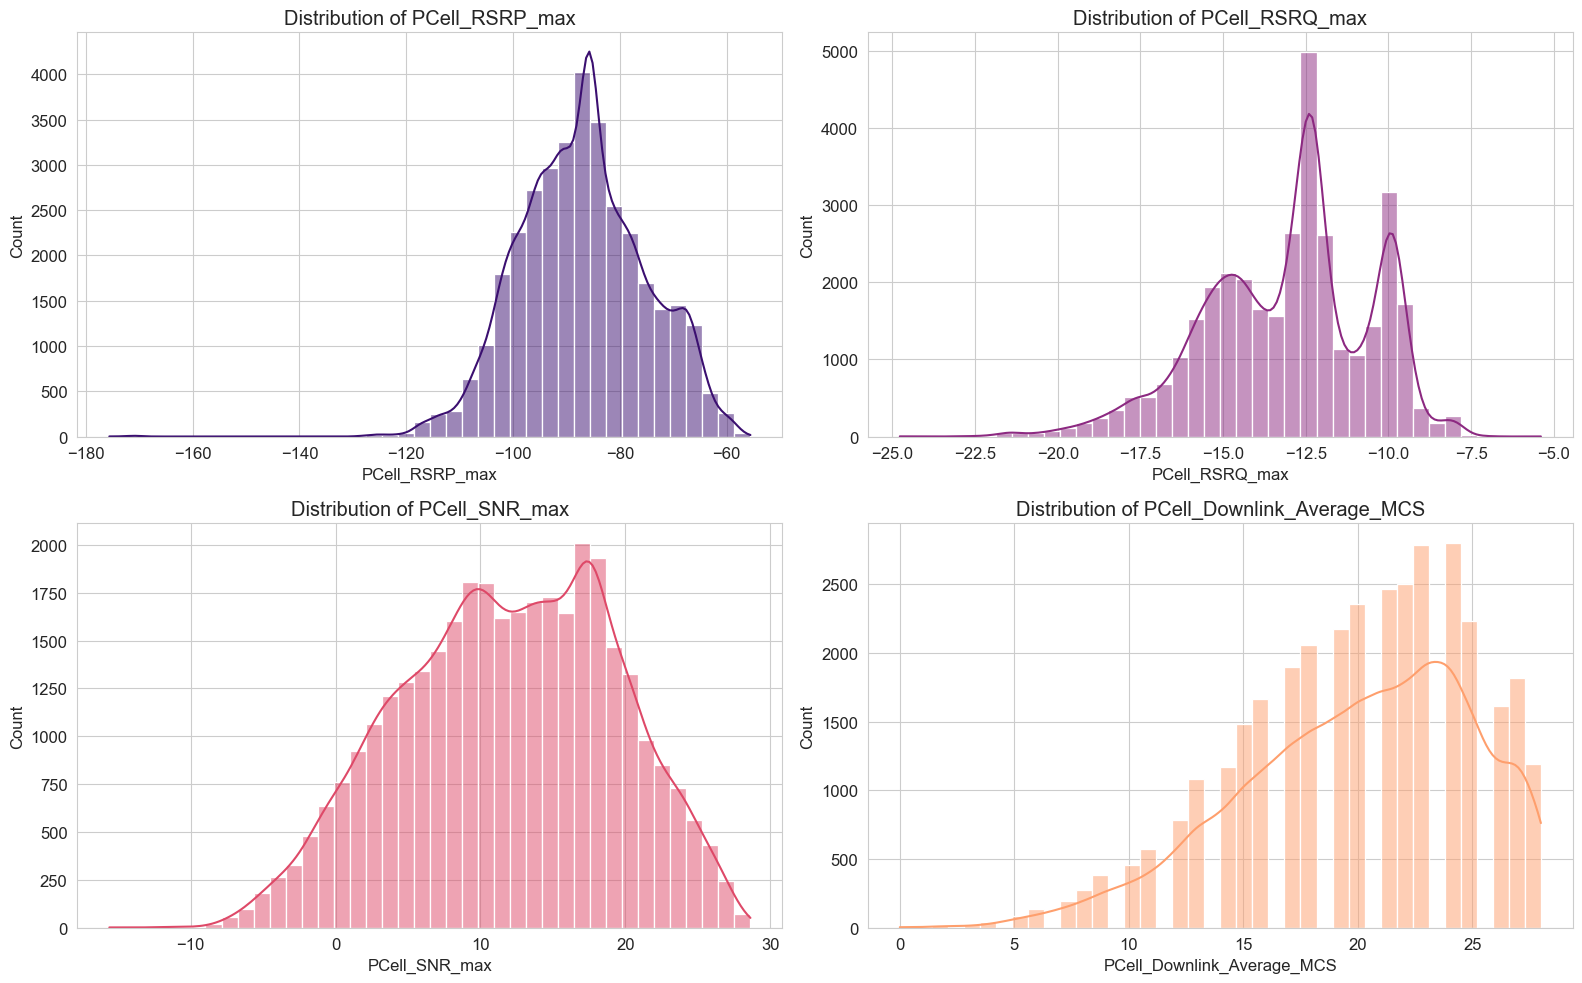

In [11]:
signal_cols = ['PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_SNR_max', 'PCell_Downlink_Average_MCS']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(signal_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=40, color=sns.color_palette('magma', 4)[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Insights:**
- **RSRP (Signal Strength):** Values are centered around -80 to -100 dBm, which is a typical range for mobile networks. 
- **RSRQ (Signal Quality):** Most values are in the -10 to -15 dB range, indicating decent to good signal quality.
- **SNR (Signal-to-Noise Ratio):** The distribution is wide, with a peak around 10-15 dB. Higher is better.
- **MCS (Modulation and Coding Scheme):** The distribution is multi-modal, with peaks at higher MCS values (e.g., >20), indicating the network is often able to use highly efficient data transmission schemes. Lower values suggest challenging signal conditions.

## 5. Bivariate and Multivariate Analysis

Now we explore the relationships between variables.

### 5.1. Correlation Matrix

A correlation matrix gives a quick overview of linear relationships between all numerical variables. This is especially useful for seeing which features are most correlated with the `target`.

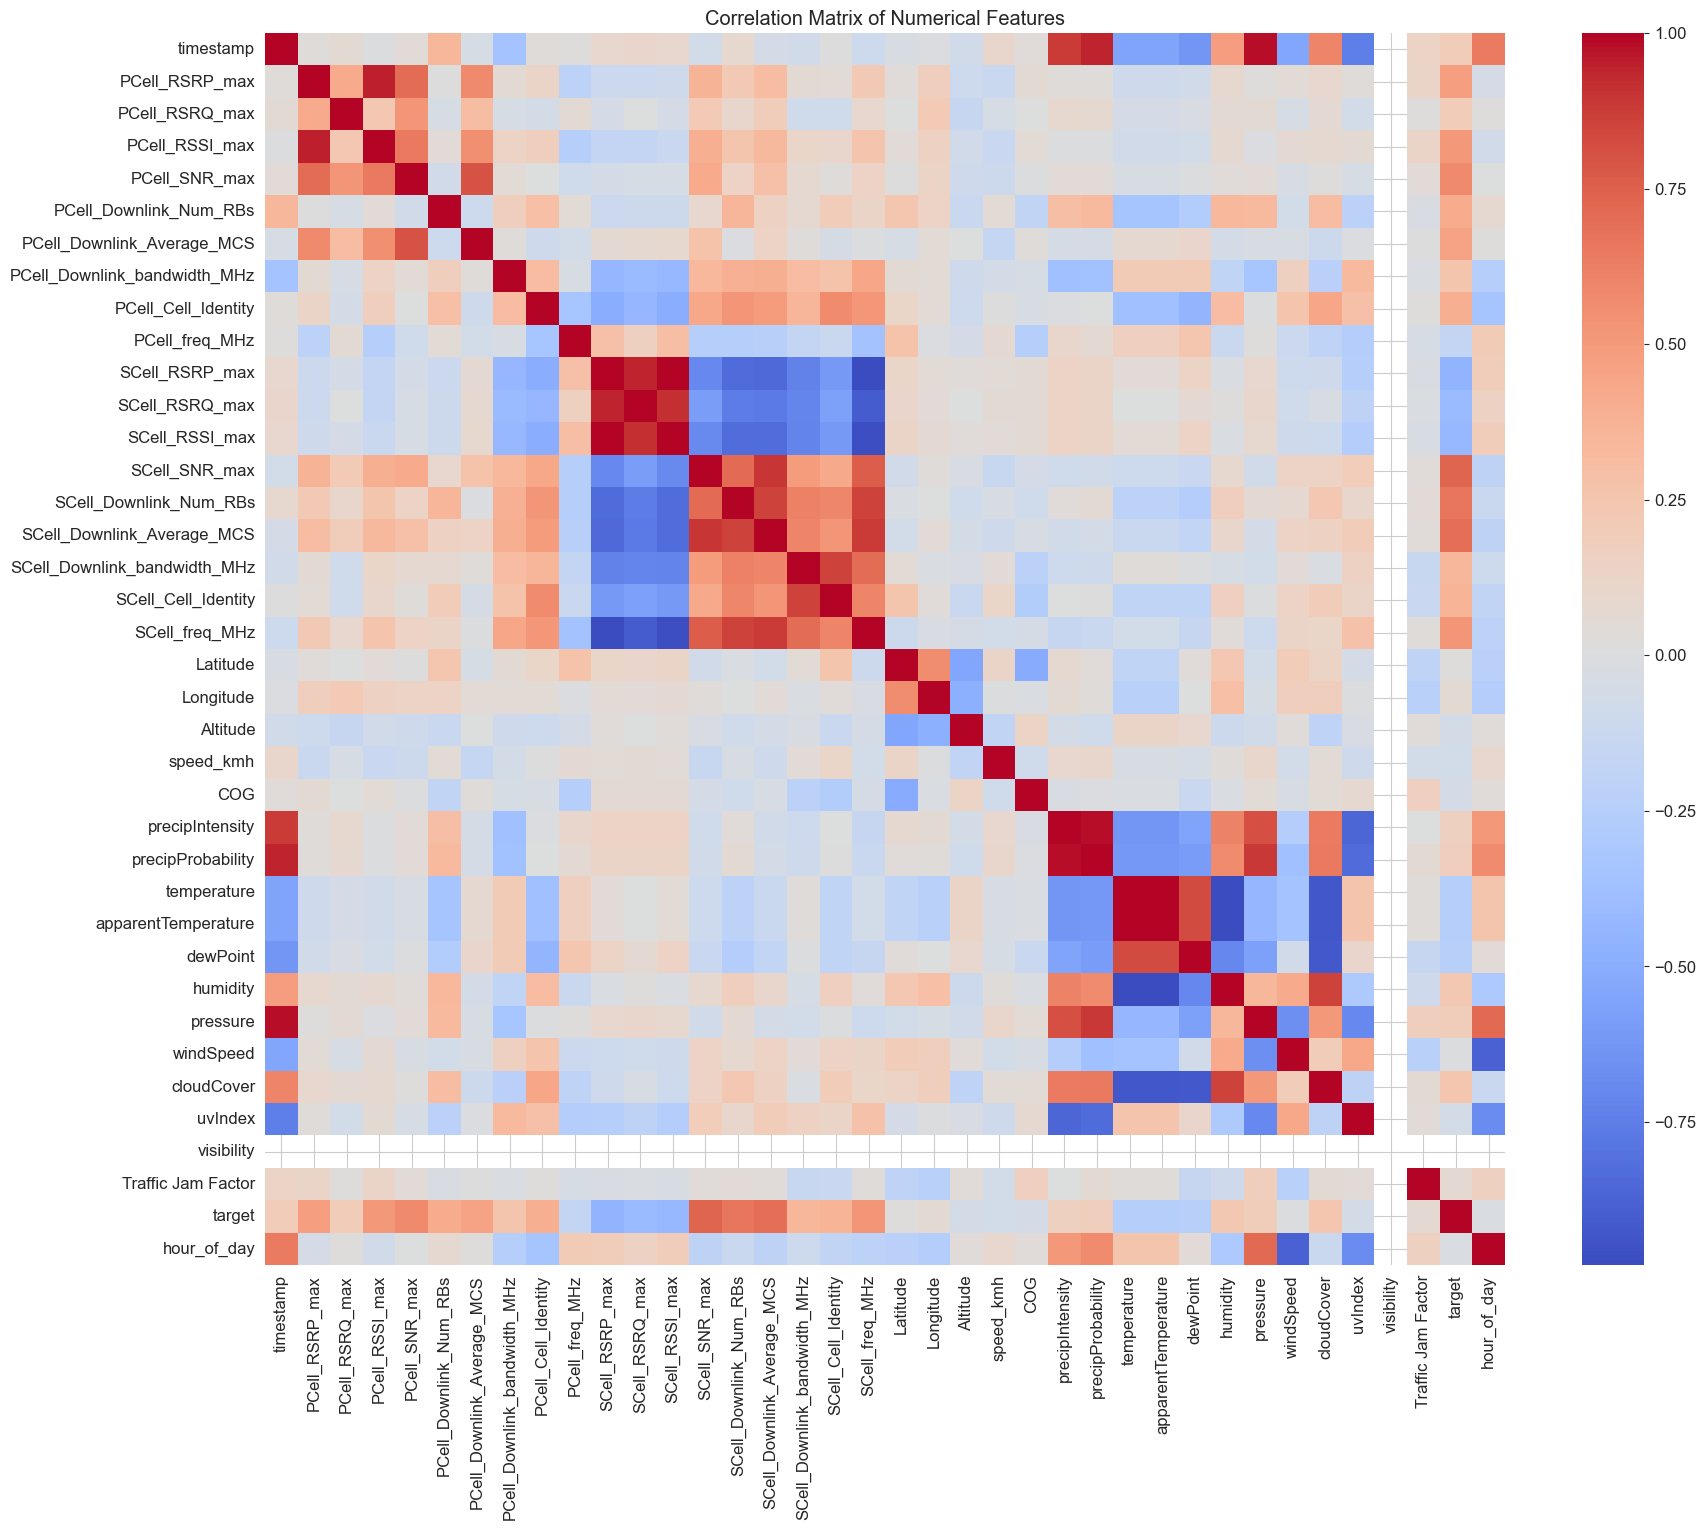

In [12]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(20, 16))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # Annot=True can be slow on large number of features
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:
# To see the most important correlations more clearly
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("Top 10 features most positively correlated with Target:")
print(target_corr.head(11))
print("\nTop 5 features most negatively correlated with Target:")
print(target_corr.tail(5))

Top 10 features most positively correlated with Target:
target                        1.000000
SCell_SNR_max                 0.730383
SCell_Downlink_Average_MCS    0.692474
SCell_Downlink_Num_RBs        0.659871
PCell_SNR_max                 0.578254
SCell_freq_MHz                0.520608
PCell_RSSI_max                0.509748
PCell_RSRP_max                0.476838
PCell_Downlink_Average_MCS    0.453623
PCell_Downlink_Num_RBs        0.407318
PCell_Cell_Identity           0.391666
Name: target, dtype: float64

Top 5 features most negatively correlated with Target:
temperature      -0.248663
SCell_RSRQ_max   -0.409036
SCell_RSSI_max   -0.431075
SCell_RSRP_max   -0.454915
visibility             NaN
Name: target, dtype: float64


**Key Insights from Correlation:**

1.  **Strongest Predictors:** The `target` (throughput) is most strongly and positively correlated with network performance metrics, especially **`PCell_Downlink_Average_MCS`**, **`PCell_SNR_max`**, and **`PCell_RSRP_max`**. This is expected: better signal-to-noise ratio and higher-order modulation directly enable higher data rates.
2.  **Signal Quality:** `PCell_RSRP_max` (signal strength) has a strong positive correlation, while `PCell_RSRQ_max` (signal quality) also shows a positive correlation. This confirms that better signal conditions lead to higher throughput.
3.  **SCell Contribution:** The SCell metrics (`SCell_SNR_max`, `SCell_Downlink_Num_RBs`, etc.) also show a moderate positive correlation, indicating that carrier aggregation (using a secondary cell) contributes positively to the overall throughput.
4.  **Weather:** Weather conditions like `temperature` and `uvIndex` show some, albeit weaker, correlation. Environmental factors might play a secondary role.
5.  **Multicollinearity:** Many signal metrics are highly correlated with each other (e.g., `RSRP` and `SNR`). This is important to note for building machine learning models.

### 5.2. Target vs. Categorical Features

Let's visualize how the target variable changes across different categories.

C:\Users\vishn\AppData\Local\Temp\ipykernel_32388\3656764629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='area', y='target', data=df, ax=axes[0], palette='crest')
C:\Users\vishn\AppData\Local\Temp\ipykernel_32388\3656764629.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='operator', y='target', data=df, ax=axes[1], palette='flare')
C:\Users\vishn\AppData\Local\Temp\ipykernel_32388\3656764629.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_scell', y='target', data=df, ax=axes[2], palette='magma')


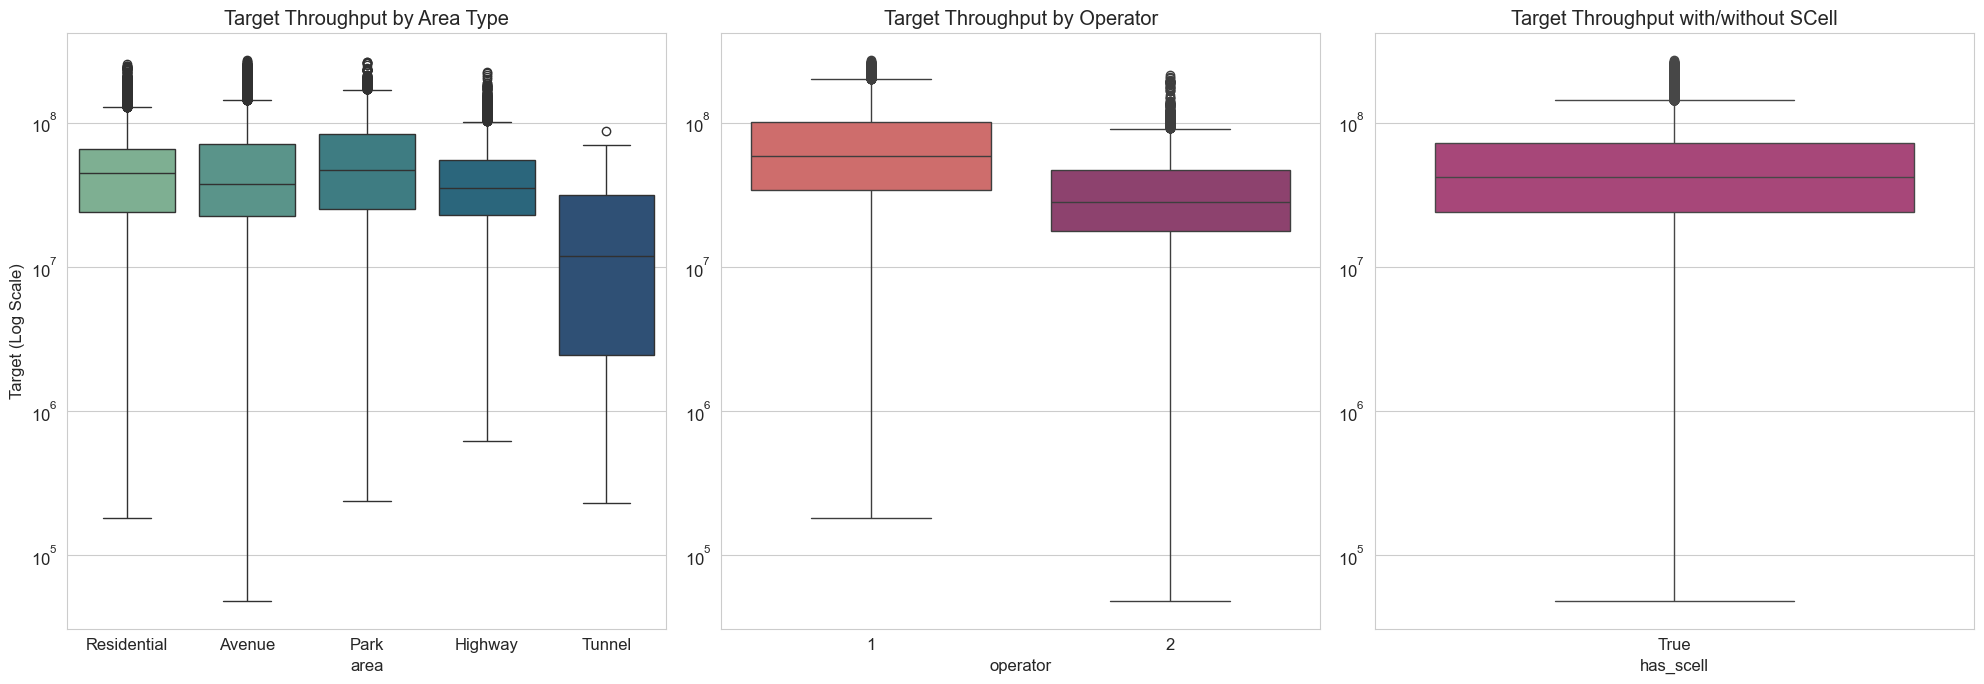

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

sns.boxplot(x='area', y='target', data=df, ax=axes[0], palette='crest')
axes[0].set_title('Target Throughput by Area Type')
axes[0].set_ylabel('Target (Log Scale)')
axes[0].set_yscale('log') # Use log scale due to skewness

sns.boxplot(x='operator', y='target', data=df, ax=axes[1], palette='flare')
axes[1].set_title('Target Throughput by Operator')
axes[1].set_ylabel('')
axes[1].set_yscale('log')

sns.boxplot(x='has_scell', y='target', data=df, ax=axes[2], palette='magma')
axes[2].set_title('Target Throughput with/without SCell')
axes[2].set_ylabel('')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

**Insights:**

- **Area Type:** Performance appears to vary by area. `Avenues` and `Parks` might have different performance characteristics than `Residential` areas or `Highways`. The median throughput seems higher in Avenues in this small sample.
- **Operator:** There is a noticeable difference in the median performance and distribution between `Operator 1` and `Operator 2`. Operator 1 appears to deliver higher median throughput in this sample.
- **SCell Impact:** As expected, the median throughput is significantly higher when a Secondary Cell is active (`has_scell` is True). This confirms the benefit of carrier aggregation technology.

### 5.3. Target vs. Key Numerical Predictors

Let's create scatter plots for the features most correlated with the target.

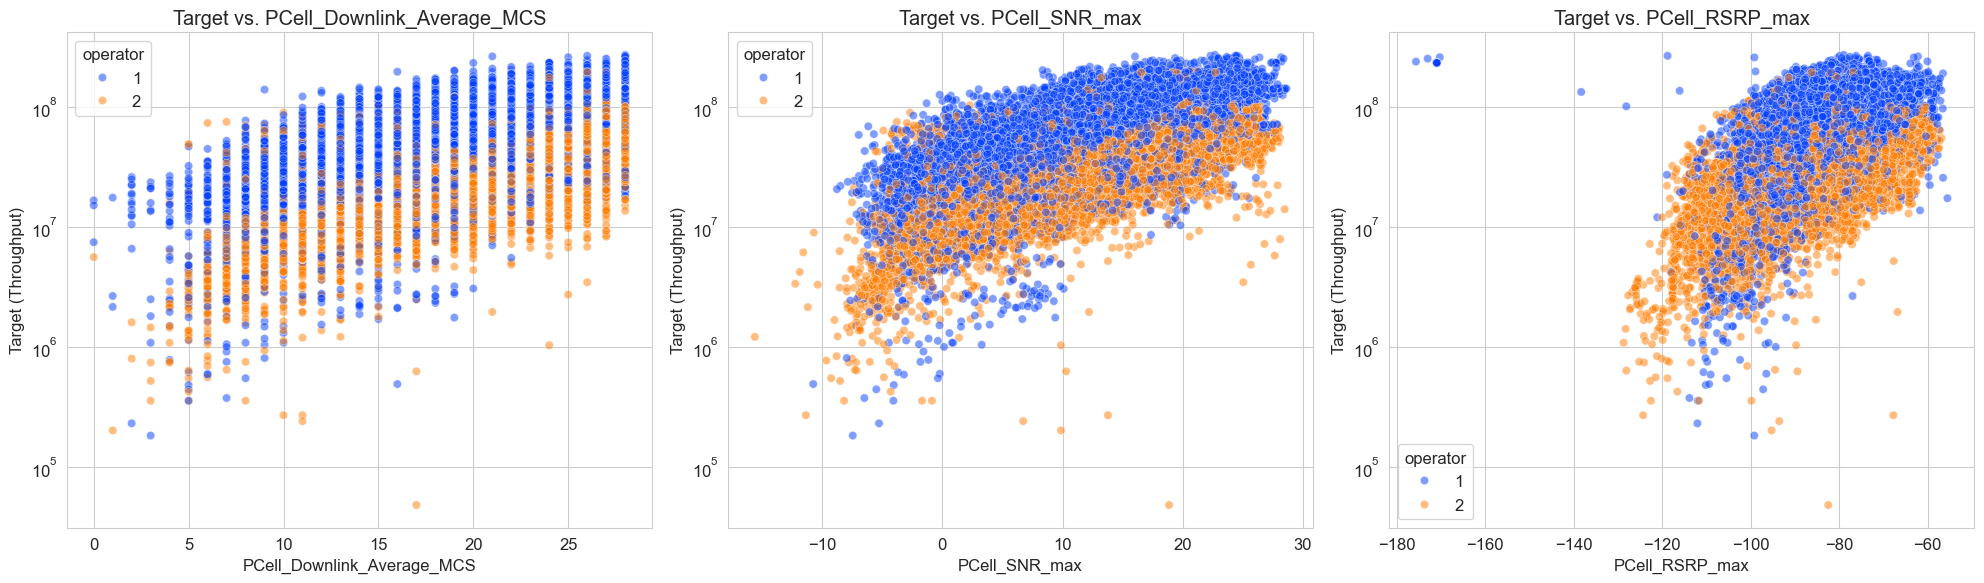

In [15]:
top_predictors = ['PCell_Downlink_Average_MCS', 'PCell_SNR_max', 'PCell_RSRP_max']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(top_predictors):
    sns.scatterplot(x=df[col], y=df['target'], ax=axes[i], alpha=0.5, hue=df['operator'], palette='bright')
    axes[i].set_title(f'Target vs. {col}')
    axes[i].set_ylabel('Target (Throughput)')
    axes[i].set_yscale('log') # Log scale for better visualization

plt.tight_layout()
plt.show()

**Insights:**

- **Clear Positive Trends:** All three plots show a clear positive relationship: as MCS, SNR, and RSRP improve (increase), the target throughput also increases. 
- **MCS Relationship:** The relationship between MCS and throughput is particularly strong and almost step-like, as higher MCS values directly unlock higher data rates.
- **SNR/RSRP Saturation:** For SNR and RSRP, the throughput increases steeply at first and then starts to plateau, suggesting that beyond a certain point of signal quality, other factors (like backhaul capacity, number of users, or resource block allocation) become the bottleneck.

## 6. Geospatial Analysis

With Latitude and Longitude data, we can map the measurements to look for geographic patterns in network performance.

In [16]:
# Create a base map centered around the mean lat/lon of the data
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
world_map = folium.Map(location=map_center, zoom_start=12)

# Create a log-normalized target for better color mapping
df['target_log_norm'] = np.log1p(df['target'])
min_log_target = df['target_log_norm'].min()
max_log_target = df['target_log_norm'].max()

def get_color(log_target):
    # Normalize the value between 0 and 1
    normalized = (log_target - min_log_target) / (max_log_target - min_log_target)
    if normalized < 0.33:
        return 'red' # Low performance
    elif normalized < 0.66:
        return 'orange' # Medium performance
    else:
        return 'green' # High performance

# Add points to the map
# Note: This can be slow for the full dataset. We'll plot a sample.
sample_df = df.sample(n=min(1000, len(df)), random_state=42)
for idx, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=get_color(row['target_log_norm']),
        fill=True,
        fill_color=get_color(row['target_log_norm']),
        fill_opacity=0.7,
        popup=f"Target: {row['target']:.0f}\nOperator: {row['operator']}"
    ).add_to(world_map)

print("Map of Network Performance (Sample of 1000 points)")
print("Green = High Performance, Orange = Medium, Red = Low")
display(world_map)

Map of Network Performance (Sample of 1000 points)
Green = High Performance, Orange = Medium, Red = Low


**Insight:** The map visually confirms that network performance is not uniform across the city. There are clear clusters of high (green) and low (red) performance. This kind of visualization is extremely powerful for network operators to identify problem areas, plan for network upgrades, or investigate localized interference issues.

## 7. Time-Series Analysis

Let's see if performance varies by the time of day.

C:\Users\vishn\AppData\Local\Temp\ipykernel_32388\486842208.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour_of_day', y='target', data=df, hue='operator', ci=None, marker='o', palette='plasma')


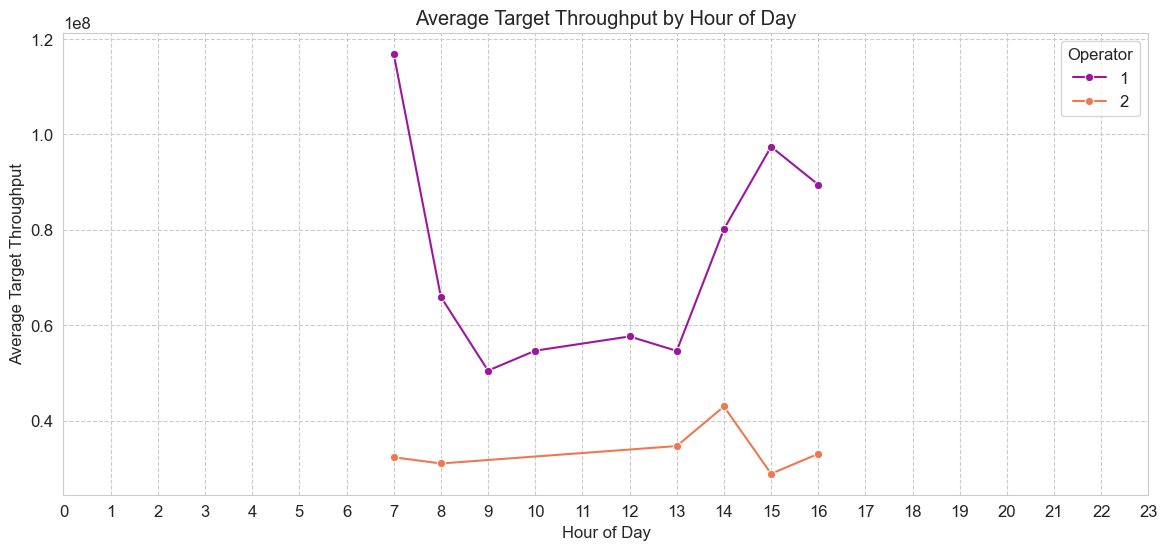

In [17]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='hour_of_day', y='target', data=df, hue='operator', ci=None, marker='o', palette='plasma')
plt.title('Average Target Throughput by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Target Throughput')
plt.xticks(np.arange(0, 24, 1))
plt.legend(title='Operator')
plt.grid(True, which='both', linestyle='--')
plt.show()

**Insight:** Based on the sample, there seems to be a variation in performance throughout the day. The full dataset would likely reveal a clearer pattern, such as lower performance during peak usage hours (e.g., afternoon and evening) and higher performance during off-peak hours (e.g., early morning). The performance gap between the two operators also appears to persist across different times of the day.

## 8. Summary and Key Insights

This comprehensive EDA has revealed several key factors influencing mobile network performance.

1.  **Primary Performance Drivers:** The target throughput is overwhelmingly driven by core radio signal conditions. **`PCell_Downlink_Average_MCS`** and **`PCell_SNR_max`** are the most critical predictors. This highlights the fundamental importance of maintaining a high-quality, low-noise radio link to the user.

2.  **Carrier Aggregation is Key:** The activation of a Secondary Cell (`has_scell` = True) provides a significant boost to throughput. This confirms the effectiveness of this 4G/5G technology in enhancing user experience.

3.  **Operator-Specific Performance:** There is a clear and consistent performance difference between the two operators, with `Operator 1` generally showing a higher median throughput in the analyzed data. This could be due to differences in network deployment, spectrum allocation, or configuration.

4.  **Geographic Hotspots and Coldspots:** Performance is highly location-dependent. The geospatial analysis revealed distinct areas of high and low performance, providing a clear map for targeted network optimization.

5.  **Context Matters:** The type of `area` (Residential, Park, etc.) influences performance, likely due to different cell tower densities, building penetration losses, and user concentrations.

6.  **Temporal Patterns:** Performance varies by the time of day, probably linked to network congestion patterns.

### Next Steps

- **Machine Learning Model:** The insights gained here form a strong foundation for building a predictive model for network throughput. Key features would include the signal metrics (RSRP, SNR, MCS), the `has_scell` flag, and categorical features like `operator` and `area`.
- **Deeper Investigation:** Further analysis could be done to investigate the cause of low-performance zones. Are they characterized by low RSRP (coverage holes), low SNR (high interference), or something else?
- **More Advanced Feature Engineering:** Create interaction features, such as `RSRP * MCS`, or features that describe the stability of the signal over a small time window.